In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kashishparmar02/social-media-sentiments-analysis-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'social-media-sentiments-analysis-dataset' dataset.
Path to dataset files: /kaggle/input/social-media-sentiments-analysis-dataset


In [2]:
import littlelearn as ll
from littlelearn import DeepLearning as dl
from torch import nn
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
df = pd.read_csv(path + '/sentimentdataset.csv')
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Text'].to_list())
len(tokenizer.word_index)

2577

In [5]:
y_train = ll.preprocessing.LabelEncoder().fit_encod(df['Sentiment'].to_list())
y_train

array([  0,   1,   0,   0,   2,   0,   0,   0,   1,   2,   0,   1,   0,
         0,   2,   0,   0,   0,   2,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,   3,   4,
         5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  17,  23,  20,  21,
        27,  28,  24,  25,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  30,  30,  31,  32,  33,  34,  35,  36,
        43,  38,  39,  40,  44,  45,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  48,  61,  50,  5

In [6]:
x_train = tokenizer.texts_to_sequences(df['Text'].to_list())
x_train = pad_sequences(x_train, maxlen=25,padding='post')


#Lets take best practice with torch and look performance with transformers model. Note : its extreem datasets with 732 data and 279 class target data

In [11]:
class BlockLCM (nn.Module) :
  def __init__ (self,d_model) :
    super().__init__()
    self.norm = nn.LayerNorm(d_model)
    self.step1 = nn.Linear(d_model,d_model)
    self.step2 = nn.Linear(d_model,d_model)
    self.magnitude_layers = nn.Linear(d_model,d_model)
    self.gelu1 = nn.GELU(approximate='tanh')
    self.gelu2 = nn.GELU(approximate='tanh')
    self.tanh = nn.Tanh()

  def forward(self,x) :

    norm1 = self.norm(x)
    step1 = self.step1(norm1)
    step2 = self.step2(norm1)
    step1 = self.gelu1(step1)
    step2 = self.gelu2(step2)
    laten = step1 + step2
    laten = self.magnitude_layers(laten)
    laten = self.tanh(laten)
    return x + laten

In [7]:
class LCM_NLP (nn.Module) :
  def __init__ (self,vocab_size,d_model,maxpos) :
    super().__init__()
    self.embedding = nn.Embedding(vocab_size,d_model)
    self.learn_pos = nn.Embedding(maxpos,d_model)
    self.lcm_Block = nn.ModuleList([BlockLCM(d_model) for _ in range(5)])
    self.linear_out = nn.Linear(d_model,279)
    self.d_model = d_model

  def forward(self,x) :
    B,S = x.shape
    x = self.embedding(x)
    x *= torch.sqrt(torch.tensor(self.d_model))
    pos = torch.arange(0,S).unsqueeze(0).to(x.device)
    pos = self.learn_pos(pos)
    x = x + pos

    for layers in self.lcm_Block :
      x = layers(x)
    x = x.mean(dim=1)
    return self.linear_out(x)

In [8]:
class TransformersBlock (nn.Module) :
  def __init__ (self,d_model,ffn_dim,drop_rate :float = 0.1) :
    super().__init__()
    self.attention = nn.MultiheadAttention(d_model,4,dropout=drop_rate,batch_first=True)
    self.norm1 = nn.LayerNorm(d_model)
    self.norm2 = nn.LayerNorm(d_model)
    self.ffn = nn.Sequential(
        nn.Linear(d_model,ffn_dim),
        nn.GELU(approximate='tanh'),
        nn.Linear(ffn_dim,d_model)
    )
    self.dropout = nn.Dropout(drop_rate)


  def forward(self,x) :
    norm1  = self.norm1(x)
    attn,_ = self.attention(norm1,norm1,norm1)
    x = x + attn

    norm2 = self.norm2(x)
    ffn = self.ffn(norm2)
    ffn = self.dropout(ffn)
    x = x + ffn
    return x

In [9]:
class Transfrormers (nn.Module)  :
  def __init__(self,d_model,ffn_dim,vocab_size,maxpos,drop_rate) :
    super().__init__()
    self.embedding = nn.Embedding(vocab_size,d_model)
    self.learn_pos = nn.Embedding(maxpos,d_model)
    self.transformers_block = nn.ModuleList([TransformersBlock(d_model,ffn_dim,drop_rate) for _ in range(5)])
    self.linear_out = nn.Linear(d_model,279)
    self.d_model = d_model


  def forward(self,x) :
    x = self.embedding(x)
    x *= torch.sqrt(torch.tensor(self.d_model))
    pos = torch.arange(0,x.shape[1]).unsqueeze(0).to(x.device)
    pos = self.learn_pos(pos)
    x = x + pos
    for layers in self.transformers_block :
      x = layers(x)
    x = x.mean(dim=1)
    return self.linear_out(x)

# Lets make model with fair d_model units

In [20]:
Lcm_model = LCM_NLP(len(tokenizer.index_word) + 1,512,26)
Lcm_model.to('cuda')
Lcm_model.train(True)

transformers_model = Transfrormers(512,512,len(tokenizer.index_word) + 1,26,0.1)
transformers_model.to('cuda')
transformers_model.train(True)


Transfrormers(
  (embedding): Embedding(2578, 512)
  (learn_pos): Embedding(26, 512)
  (transformers_block): ModuleList(
    (0-4): 5 x TransformersBlock(
      (attention): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
      )
      (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (ffn): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): GELU(approximate='tanh')
        (2): Linear(in_features=512, out_features=512, bias=True)
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (linear_out): Linear(in_features=512, out_features=279, bias=True)
)

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(Lcm_model.parameters(),lr=1e-3)
loss_hits_lcm = []

In [14]:
x_train = torch.tensor(x_train,dtype=torch.int32).to('cuda')
y_train = torch.tensor(y_train,dtype=torch.long).to('cuda')

In [23]:
epochs = 100
for epoch in range(epochs) :
  y_pred = Lcm_model(x_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  nn.utils.clip_grad_norm_(Lcm_model.parameters(),1.0)
  optimizer.step()
  loss_hits_lcm.append(loss.item())
  print(f"[epoch {epoch + 1}/{epochs} || loss : {loss.item():.7f}]")

[epoch 1/100 || loss : 19.6610775]
[epoch 2/100 || loss : 12.1127586]
[epoch 3/100 || loss : 9.1007538]
[epoch 4/100 || loss : 8.4065008]
[epoch 5/100 || loss : 7.6709499]
[epoch 6/100 || loss : 7.3148193]
[epoch 7/100 || loss : 6.8439822]
[epoch 8/100 || loss : 6.3971243]
[epoch 9/100 || loss : 6.0771446]
[epoch 10/100 || loss : 5.8559489]
[epoch 11/100 || loss : 5.4546032]
[epoch 12/100 || loss : 4.7635612]
[epoch 13/100 || loss : 4.3476858]
[epoch 14/100 || loss : 3.8666215]
[epoch 15/100 || loss : 3.4322851]
[epoch 16/100 || loss : 2.9950345]
[epoch 17/100 || loss : 2.6346674]
[epoch 18/100 || loss : 2.3267746]
[epoch 19/100 || loss : 2.1585159]
[epoch 20/100 || loss : 1.8476933]
[epoch 21/100 || loss : 1.5685401]
[epoch 22/100 || loss : 1.4145976]
[epoch 23/100 || loss : 1.2397912]
[epoch 24/100 || loss : 1.0925974]
[epoch 25/100 || loss : 0.9479080]
[epoch 26/100 || loss : 0.7926558]
[epoch 27/100 || loss : 0.6265171]
[epoch 28/100 || loss : 0.5105789]
[epoch 29/100 || loss : 0.4

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(transformers_model.parameters(),lr=1e-3)
loss_hits_transformers = []

In [25]:
epochs = 100
for epoch in range(epochs) :
  y_pred = transformers_model(x_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  nn.utils.clip_grad_norm_(transformers_model.parameters(),1.0)
  optimizer.step()
  loss_hits_transformers.append(loss.item())
  print(f"[epoch {epoch + 1}/{epochs} || loss : {loss.item():.7f}]")

[epoch 1/100 || loss : 21.7408752]
[epoch 2/100 || loss : 14.7190599]
[epoch 3/100 || loss : 11.8856220]
[epoch 4/100 || loss : 9.8217564]
[epoch 5/100 || loss : 8.9131889]
[epoch 6/100 || loss : 8.7417860]
[epoch 7/100 || loss : 8.3125668]
[epoch 8/100 || loss : 7.2523446]
[epoch 9/100 || loss : 6.0389957]
[epoch 10/100 || loss : 5.6606712]
[epoch 11/100 || loss : 5.0499940]
[epoch 12/100 || loss : 4.4311113]
[epoch 13/100 || loss : 3.5424511]
[epoch 14/100 || loss : 2.7887356]
[epoch 15/100 || loss : 2.2820919]
[epoch 16/100 || loss : 1.7093160]
[epoch 17/100 || loss : 1.2729353]
[epoch 18/100 || loss : 0.8845922]
[epoch 19/100 || loss : 0.5621214]
[epoch 20/100 || loss : 0.3211558]
[epoch 21/100 || loss : 0.1625583]
[epoch 22/100 || loss : 0.0792506]
[epoch 23/100 || loss : 0.0389604]
[epoch 24/100 || loss : 0.0254118]
[epoch 25/100 || loss : 0.0163104]
[epoch 26/100 || loss : 0.0135586]
[epoch 27/100 || loss : 0.0138237]
[epoch 28/100 || loss : 0.0084882]
[epoch 29/100 || loss : 0.

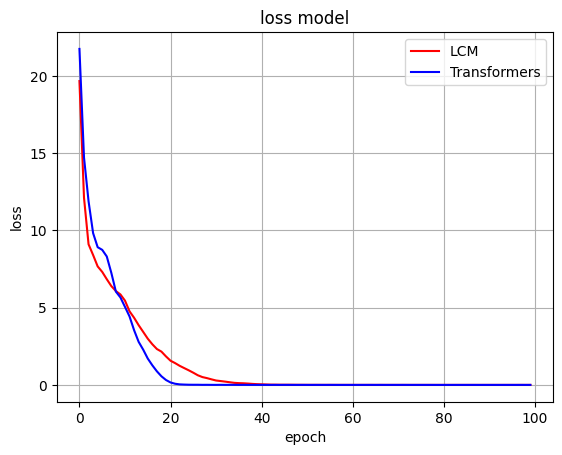

In [26]:
plt.title(f"loss model")
plt.plot(loss_hits_lcm,color='red',label='LCM')
plt.plot(loss_hits_transformers,color='blue',label='Transformers')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
Lcm_model.eval()
Lcm_model.to('cpu')
transformers_model.eval()
transformers_model.to('cpu')

Transfrormers(
  (embedding): Embedding(2578, 512)
  (learn_pos): Embedding(26, 512)
  (transformers_block): ModuleList(
    (0-4): 5 x TransformersBlock(
      (attention): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
      )
      (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (ffn): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): GELU(approximate='tanh')
        (2): Linear(in_features=512, out_features=512, bias=True)
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (linear_out): Linear(in_features=512, out_features=279, bias=True)
)

In [28]:
sample_random = torch.rand(1,25,512)

In [49]:
class BlockLCM_research (nn.Module) :
  def __init__ (self,d_model) :
    super().__init__()
    self.norm = nn.LayerNorm(d_model)
    self.step1 = nn.Linear(d_model,d_model)
    self.step2 = nn.Linear(d_model,d_model)
    self.magnitude_layers = nn.Linear(d_model,d_model)
    self.gelu1 = nn.GELU(approximate='tanh')
    self.gelu2 = nn.GELU(approximate='tanh')
    self.tanh = nn.Tanh()
    self.hist = list()
    self.name_activity = list()

  def forward(self,x) :

    norm1 = self.norm(x)
    self.hist.append(norm1.detach().numpy())
    self.name_activity.append('norm')
    step1 = self.step1(norm1)
    step2 = self.step2(norm1)
    step1 = self.gelu1(step1)
    self.hist.append(step1.detach().numpy())
    self.name_activity.append('step1 + Gelu')
    step2 = self.gelu2(step2)
    self.hist.append(step2.detach().numpy())
    self.name_activity.append('step2 + Gelu')
    laten = step1 + step2
    self.hist.append(laten.detach().numpy())
    self.name_activity.append('laten (step1 + step2)')
    laten = self.magnitude_layers(laten)
    laten = self.tanh(laten)
    self.hist.append(laten.detach().numpy())
    self.name_activity.append('magnitude_layers laten + tanh')
    x =  x + laten
    self.hist.append(x.detach().numpy())
    self.name_activity.append('residural connection laten')
    return x

In [50]:
lcm_block_research = BlockLCM_research(512)
with torch.no_grad() :
  lcm_block_research(sample_random)

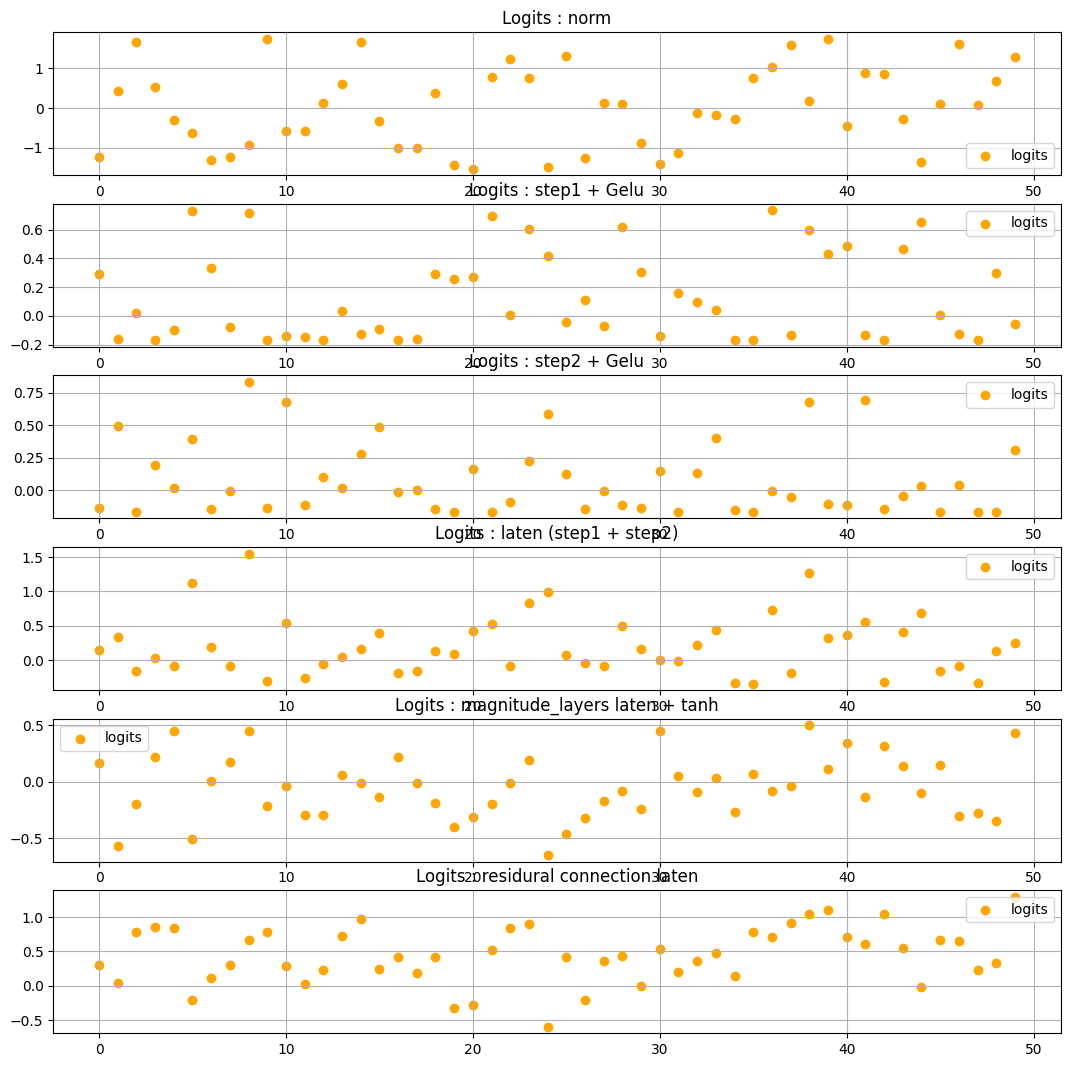

In [53]:
fig,ax = plt.subplots(len(lcm_block_research.hist),figsize=(13,13))
for i in range(len(lcm_block_research.hist)) :
  data = lcm_block_research.hist[i]
  ax[i].scatter(np.arange(len(data.flatten()[:50])),data.flatten()[:50],color='orange',label='logits')
  ax[i].set_title(f"Logits : {lcm_block_research.name_activity[i]}")
  ax[i].legend()
  ax[i].grid(True)
plt.show()


#Make Model with LittleLearn for look Gradient maginitude and outliners gradient

In [11]:
class Sentiment_classificator :
  def __init__ (self) :
    self.lcm_backbone = dl.Model.LCM.LatenConnectedModel5Block(vocab_size=len(tokenizer.index_word) + 1,d_model=512,maxpos=26,
                                                      NormMode='prenorm',laten_activation='gelu',encoding_mode="learned")
    self.pooling = dl.layers.GlobalAveragePooling1D()
    self.out_dense = dl.layers.Dense(279)
    self.node = [self.lcm_backbone,self.pooling,self.out_dense]
  def get_weight(self) :
    weight = list()
    for node in self.node :
      wg = node.get_weight()
      if wg is not None :
        for w in wg :
          weight.append(w)
    return weight

  def __call__ (self,x) :
    x = self.lcm_backbone(x)
    x = self.pooling(x)
    x = self.out_dense(x)
    return x


In [12]:
LCM_subject1 = Sentiment_classificator()
LCM_subject1(x_train[:1])
optimizer_fn = dl.optimizers.AdamW()
clipper = ll.GradientTools.ClipByNorm(LCM_subject1.get_weight(),max_norm=1.0,reduce_hist='mean')
optimizer_fn.apply_weight(LCM_subject1.get_weight())
loss_fn = dl.loss.SparseCategoricallCrossentropy(from_logits=True)
loss_record = list()

In [22]:
epochs =25
for epoch in range(epochs) :
  y_pred = LCM_subject1(x_train)
  loss = loss_fn(y_train,y_pred)
  loss.backwardpass()
  clipper.execute()
  optimizer_fn.forward_in_weight()
  loss.kill_grad()
  loss_record.append(loss.get_tensor())
  print(f"[epoch {epoch + 1}/{epochs} || loss : {loss.get_tensor():.7f}]")

[epoch 1/25 || loss : 0.6742213]
[epoch 2/25 || loss : 0.6557925]
[epoch 3/25 || loss : 0.6447618]
[epoch 4/25 || loss : 0.6274246]
[epoch 5/25 || loss : 0.6156474]
[epoch 6/25 || loss : 0.6005206]
[epoch 7/25 || loss : 0.5904168]
[epoch 8/25 || loss : 0.5750632]
[epoch 9/25 || loss : 0.5682719]
[epoch 10/25 || loss : 0.5642337]
[epoch 11/25 || loss : 0.5380393]
[epoch 12/25 || loss : 0.5369124]
[epoch 13/25 || loss : 0.5340155]
[epoch 14/25 || loss : 0.5082699]
[epoch 15/25 || loss : 0.4994592]
[epoch 16/25 || loss : 0.4900267]
[epoch 17/25 || loss : 0.4748377]
[epoch 18/25 || loss : 0.4667362]
[epoch 19/25 || loss : 0.4554652]
[epoch 20/25 || loss : 0.4470194]
[epoch 21/25 || loss : 0.4402215]
[epoch 22/25 || loss : 0.4250331]
[epoch 23/25 || loss : 0.4198355]
[epoch 24/25 || loss : 0.4177792]
[epoch 25/25 || loss : 0.4019755]


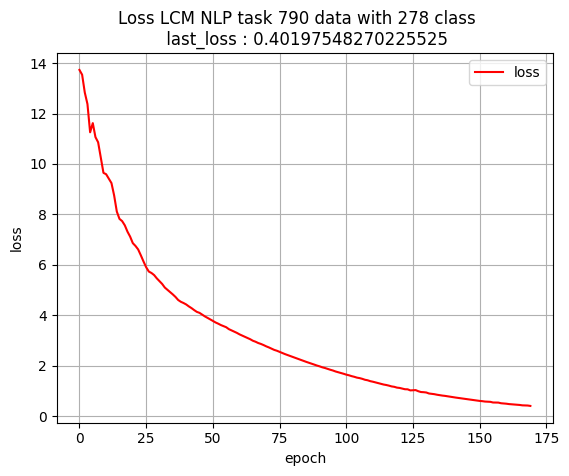

In [25]:
plt.title(f"Loss LCM NLP task 790 data with 278 class   \n last_loss : {loss_record[-1]}")
plt.plot(loss_record,color='red',label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

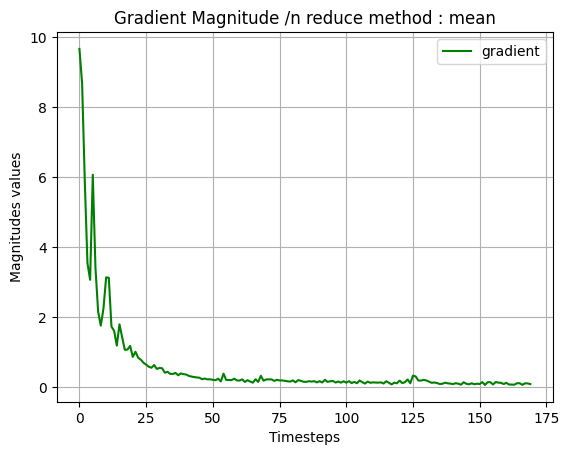

In [27]:
clipper.plot_gradient_magnitude()

In [28]:
  y_pred = LCM_subject1(x_train)
  loss = loss_fn(y_train,y_pred)
  loss.backwardpass()

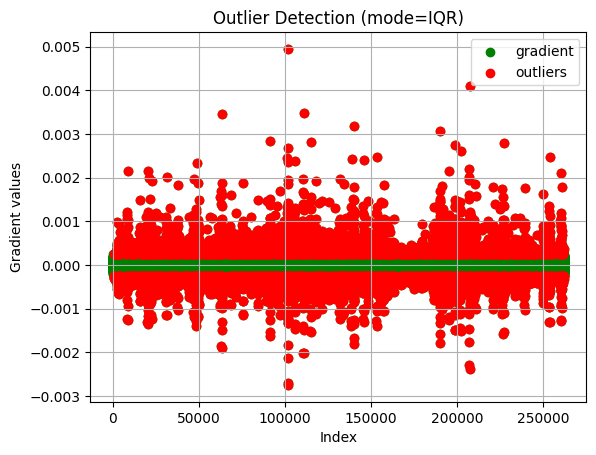

In [30]:
ll.GradientTools.gradient_outliners_scatter(LCM_subject1.lcm_backbone.block5.magnitude_layers.weight,mode='IQR')

In [ ]:
ll.GradientTools.gradient_outliners_scatter(LCM_subject1.lcm_backbone.block5.magnitude_layers.weight,mode='KDE')